## pride and prejudice

In [1]:
import pandas as pd
import numpy as np
#from bs4 import BeautifulSoup
import requests
import re
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200
plt.style.use('dark_background')

In [2]:
%%time
link = 'http://www.gutenberg.org/cache/epub/42671/pg42671.txt'
text = requests.get(link).text

CPU times: user 20.6 ms, sys: 6.29 ms, total: 26.9 ms
Wall time: 1.65 s


In [3]:
def remove_chars(x):
    x = re.sub('\r', '', x) # remove \r
    x = re.sub('[^\w\s]', '', x) # remove all spaces & special characters
    x = re.sub(' +', ' ', x) # remove multiple whitespaces
    return(x)

def clean(text_list):
    t = []
    for s in text: 
        item = remove_chars(s)
        item = item.split(sep = ' ') # sentences to word list
        while '' in item: item.remove('') # remove empty rows
        t.extend(item)
    return(t)

In [4]:
text = text.lower()
text = remove_chars(text)
text = text.split(sep = '\n')
text = text[59:] # remove blabla from start

In [5]:
len(text)

13655

In [6]:
text[:10]

['pride and prejudice',
 '',
 'a novel',
 '',
 'in three volumes',
 '',
 'by the author of sense and sensibility',
 '',
 'vol i',
 '']

## Frequencies

In [13]:
t = clean(text)
t[:25]

['pride',
 'and',
 'prejudice',
 'a',
 'novel',
 'in',
 'three',
 'volumes',
 'by',
 'the',
 'author',
 'of',
 'sense',
 'and',
 'sensibility',
 'vol',
 'i',
 'london',
 'printed',
 'for',
 't',
 'egerton',
 'military',
 'library',
 'whitehall']

In [14]:
from collections import Counter
freq_list = dict(Counter(t))

In [15]:
freq_list
freqs = pd.DataFrame.from_dict(freq_list, orient='index')
freqs.head()

,0
pride,52
and,3588
prejudice,12
a,1982
novel,3


In [16]:
from stop_words import get_stop_words

stop_words = list(get_stop_words('en'))
t = [w for w in t if not w in stop_words]

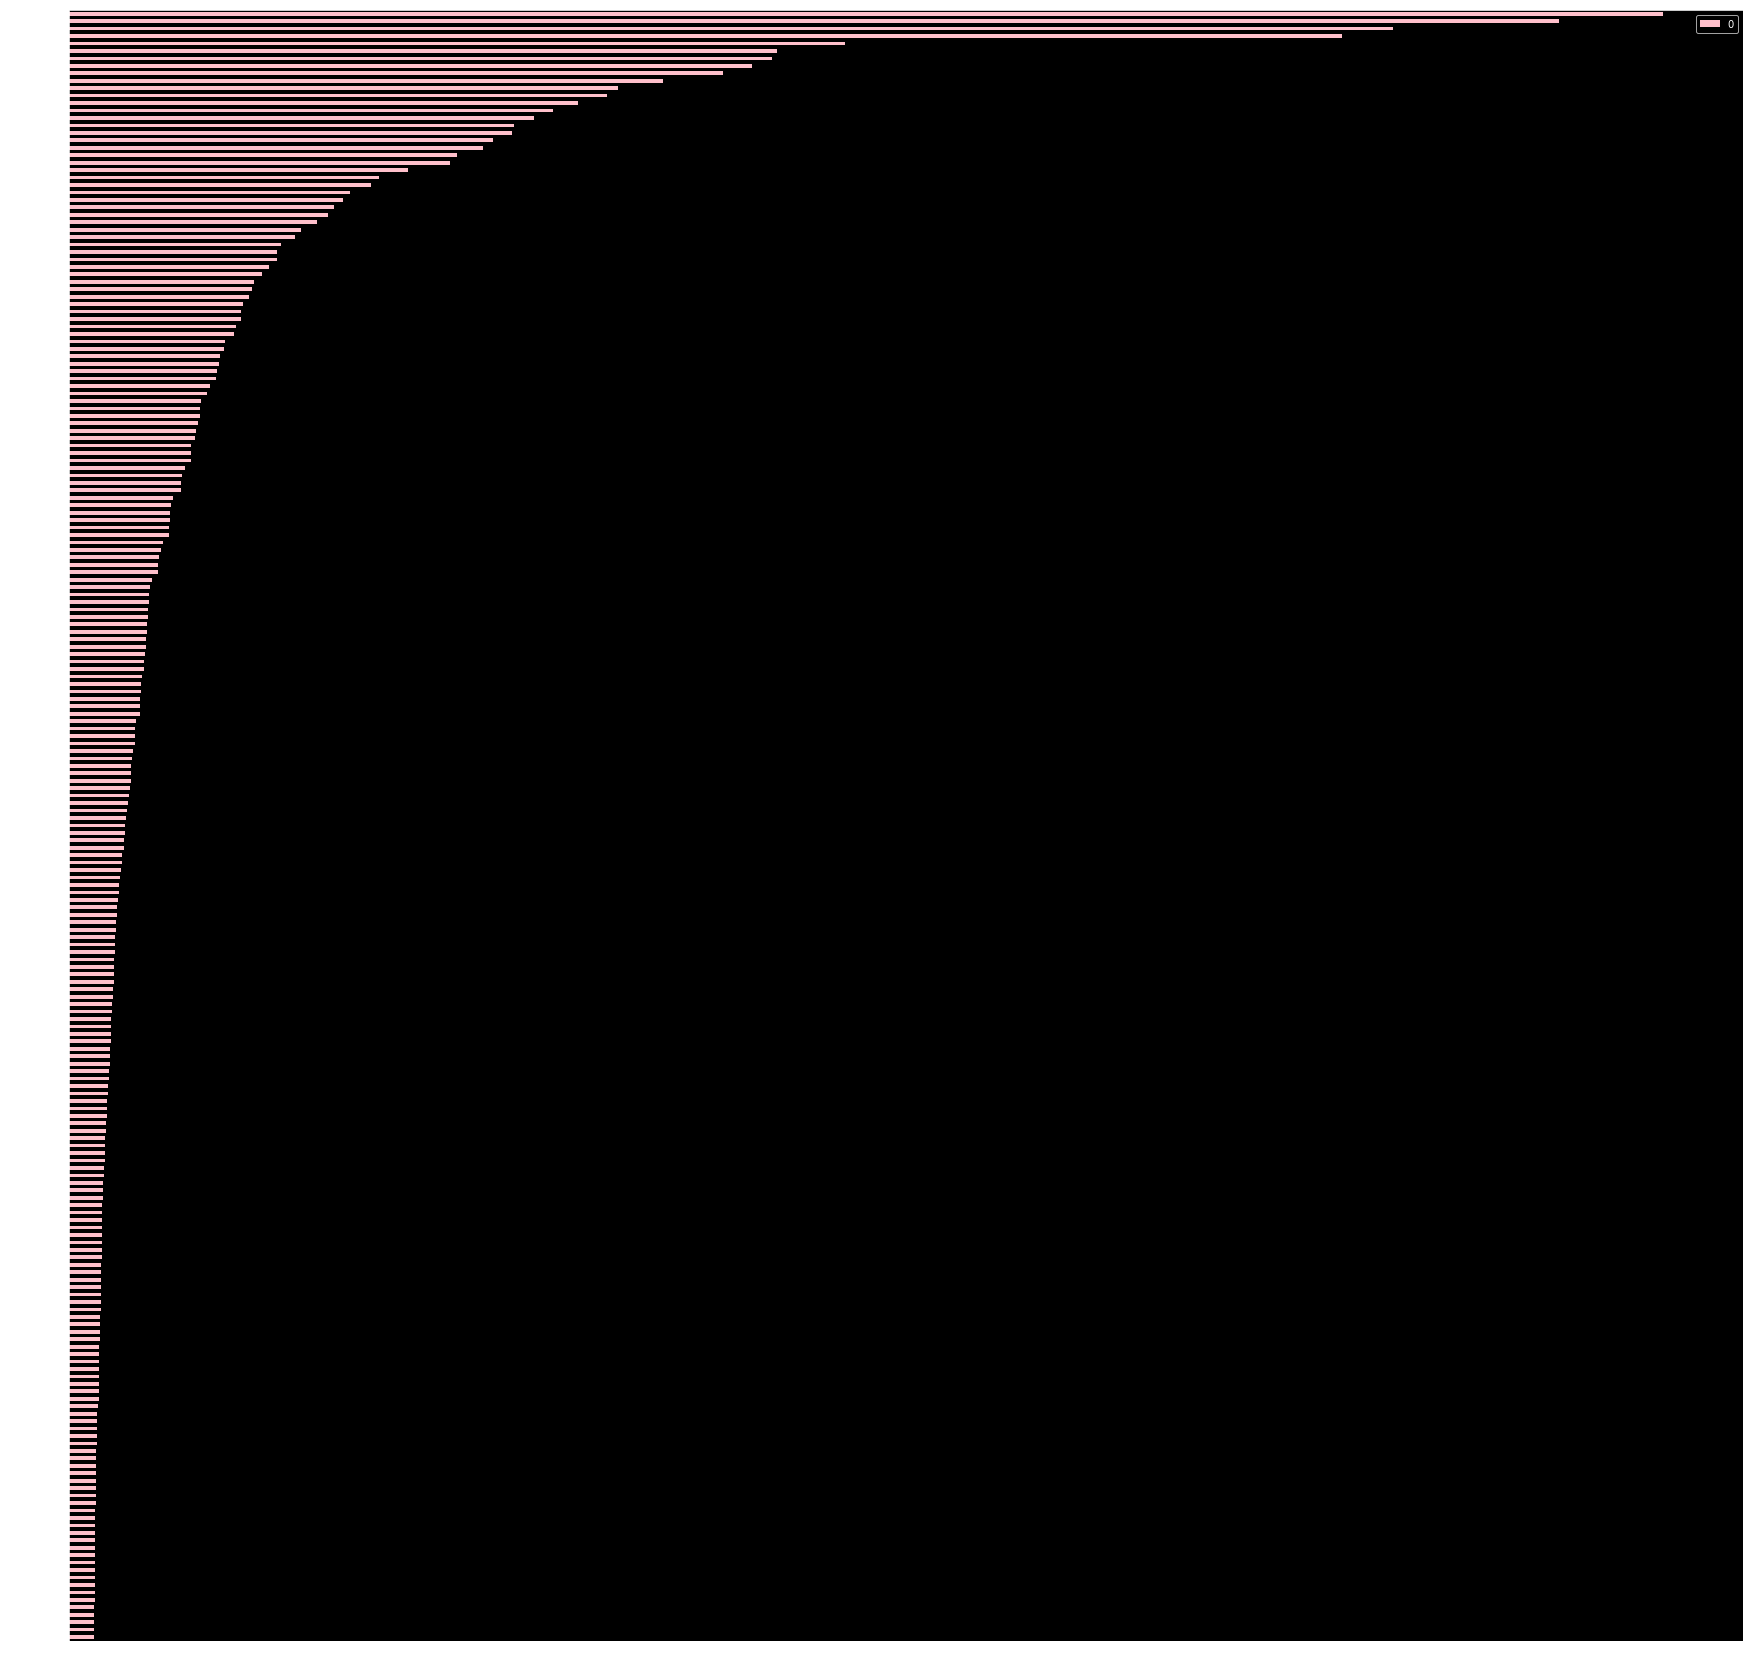

In [17]:
freqs[freqs[0] > 70].sort_values(0).plot(kind='barh', figsize=(30,30), color='Pink');

## Wordcloud

In [18]:
t = [w for w in text if w != '']
t[:25]

['pride and prejudice',
 'a novel',
 'in three volumes',
 'by the author of sense and sensibility',
 'vol i',
 'london',
 'printed for t egerton',
 'military library whitehall',
 '1813',
 'illustration morning dress',
 '_invented by mrs bell 26 charlotte street bedford square_',
 '_engraved for no 72 of la belle assemblee 1st july 1815_',
 'pride prejudice',
 'chapter i',
 'it is a truth universally acknowledged that a single man in possession',
 'of a good fortune must be in want of a wife',
 'however little known the feelings or views of such a man may be on his',
 'first entering a neighbourhood this truth is so well fixed in the minds',
 'of the surrounding families that he is considered as the rightful',
 'property of some one or other of their daughters',
 'my dear mr bennet said his lady to him one day have you heard that',
 'netherfield park is let at last',
 'mr bennet replied that he had not',
 'but it is returned she for mrs long has just been here and she',
 'told me all ab

In [19]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
remove = ['will', 'said', 'much', 'must', 'my']
for i in remove: stopwords.add(i)

wc = WordCloud(background_color="black", stopwords=stopwords, colormap='PiYG', height=1000, width=1000)

In [20]:
cloud = wc.generate(''.join(t))

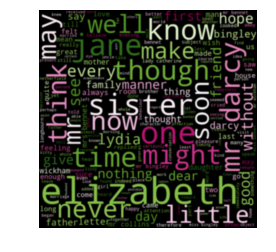

<Figure size 432x288 with 0 Axes>

In [21]:
plt.imshow(cloud, interpolation='bicubic')
plt.axis('off')
plt.figure()
plt.show()